CVS raw data 

see current working directory 

In [2]:
pwd

'/Users/xpeng'

changing directory 

In [3]:
cd downloads/

/Users/xpeng/Downloads


In [4]:
import pandas as pd

In [5]:
Comorbidity_data = pd.read_csv('Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group_and_state__United_States..csv')

In [6]:
Comorbidity_data

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
0,11/04/2020,02/01/2020,10/31/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,160.0,NaN
1,11/04/2020,02/01/2020,10/31/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,764.0,NaN
2,11/04/2020,02/01/2020,10/31/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,1951.0,NaN
3,11/04/2020,02/01/2020,10/31/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,5526.0,NaN
4,11/04/2020,02/01/2020,10/31/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,13332.0,NaN
...,...,...,...,...,...,...,...,...,...,...
12325,11/04/2020,02/01/2020,10/31/2020,PR,COVID-19,COVID-19,U071,65-74,193.0,NaN
12326,11/04/2020,02/01/2020,10/31/2020,PR,COVID-19,COVID-19,U071,75-84,202.0,NaN
12327,11/04/2020,02/01/2020,10/31/2020,PR,COVID-19,COVID-19,U071,85+,147.0,NaN
12328,11/04/2020,02/01/2020,10/31/2020,PR,COVID-19,COVID-19,U071,Not stated,0.0,NaN


In [7]:
Comorbidity_data.sort_values(by = 'Condition')


,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,Number of COVID-19 Deaths,Flag
2080,11/04/2020,02/01/2020,10/31/2020,DC,Respiratory diseases,Adult respiratory distress syndrome,J80,0-24,NaN,One or more data cells have counts between 1-9...
5516,11/04/2020,02/01/2020,10/31/2020,MN,Respiratory diseases,Adult respiratory distress syndrome,J80,75-84,76.0,NaN
5517,11/04/2020,02/01/2020,10/31/2020,MN,Respiratory diseases,Adult respiratory distress syndrome,J80,85+,66.0,NaN
5518,11/04/2020,02/01/2020,10/31/2020,MN,Respiratory diseases,Adult respiratory distress syndrome,J80,Not stated,0.0,NaN
5519,11/04/2020,02/01/2020,10/31/2020,MN,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,304.0,NaN
...,...,...,...,...,...,...,...,...,...,...
3374,11/04/2020,02/01/2020,10/31/2020,IL,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",55-64,17.0,NaN
3373,11/04/2020,02/01/2020,10/31/2020,IL,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",45-54,NaN,One or more data cells have counts between 1-9...
3372,11/04/2020,02/01/2020,10/31/2020,IL,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",35-44,0.0,NaN
2453,11/04/2020,02/01/2020,10/31/2020,FL,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",45-54,NaN,One or more data cells have counts between 1-9...


API data

In [8]:
import sys
!{sys.executable} -m pip install sodapy

In [9]:
from sodapy import Socrata
import pandas as pd 


In [10]:
#define important variables
DATASET_ID = 'hk9y-quqm'
APP_TOKEN = None

#create an interface to the cdc website, to access datasets
client = Socrata('data.cdc.gov', APP_TOKEN)

In [11]:
#an example query to the dataset
#by default, returns a list of dictionaries, where length of list == limit argument
#this query gets 25 recent data points taken from the USA
respiratory = client.get(DATASET_ID, condition_group = 'Respiratory diseases', age_group = 'All Ages', state = 'US' )


In [12]:
#convert this list into a Pandas DataFrame
respiratory_df = pd.DataFrame.from_records(respiratory) #convert list of dictionaries into DataFrame
respiratory_df.drop(columns = ['data_as_of','start_week','end_week'])


,state,condition_group,condition,icd10_codes,age_group,number_covid19_deaths
0,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,95778
1,US,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,All Ages,19486
2,US,Respiratory diseases,Adult respiratory distress syndrome,J80,All Ages,28090
3,US,Respiratory diseases,Respiratory failure,J96,All Ages,77611
4,US,Respiratory diseases,Respiratory arrest,R09.2,All Ages,4492
5,US,Respiratory diseases,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",All Ages,8441


In [13]:
COVID = client.get(DATASET_ID, age_group = 'All Ages', state = 'US' )
covid_df = pd.DataFrame.from_records(COVID)
covid_df1 = covid_df.drop(columns = ['data_as_of','start_week','end_week']).set_index('condition_group')
covid_df1

,state,condition,icd10_codes,age_group,number_covid19_deaths
condition_group,,,,,
Respiratory diseases,US,Influenza and pneumonia,J09-J18,All Ages,95778
Respiratory diseases,US,Chronic lower respiratory diseases,J40-J47,All Ages,19486
Respiratory diseases,US,Adult respiratory distress syndrome,J80,All Ages,28090
Respiratory diseases,US,Respiratory failure,J96,All Ages,77611
Respiratory diseases,US,Respiratory arrest,R09.2,All Ages,4492
Respiratory diseases,US,Other diseases of the respiratory system,"J00-J06, J20-J39, J60-J70, J81-J86, J90-J95, J...",All Ages,8441
Circulatory diseases,US,Hypertensive diseases,I10-I15,All Ages,47455
Circulatory diseases,US,Ischemic heart disease,I20-I25,All Ages,25274
Circulatory diseases,US,Cardiac arrest,I46,All Ages,26557


In [14]:
conditions = covid_df1.groupby('condition_group').count().get(['condition'])
conditions

,condition
condition_group,
All other conditions and causes (residual),1
Alzheimer disease,1
COVID-19,1
Circulatory diseases,7
Diabetes,1
"Intentional and unintentional injury, poisoning, and other adverse events",1
Malignant neoplasms,1
Obesity,1
Renal failure,1


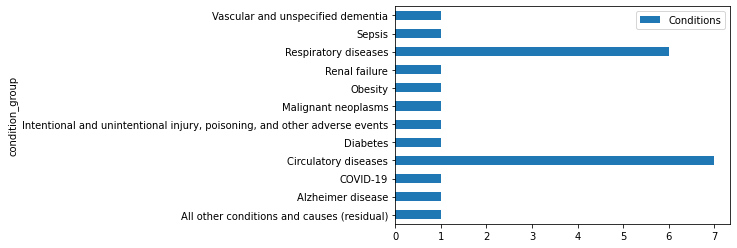

In [15]:
types = pd.DataFrame().assign(Conditions = conditions['condition'])
types.plot(kind ='barh', y = 'Conditions')

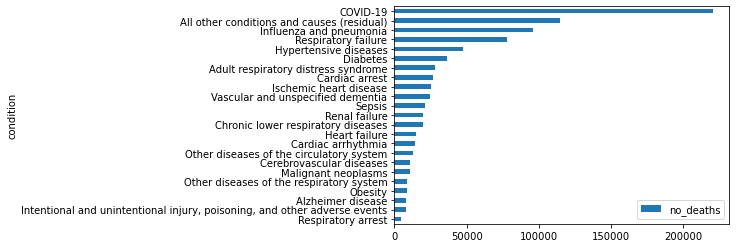

In [16]:
cormorbidity = covid_df.set_index('condition').drop(columns = ['data_as_of','start_week','end_week','condition_group', 'state', 'icd10_codes', 'age_group'])
cormorbidity1 = covid_df.set_index('condition').get(['number_covid19_deaths'])
c = pd.DataFrame().assign(no_deaths = cormorbidity1['number_covid19_deaths'])
c['no_deaths'] = c['no_deaths'].astype(int)
c = c.sort_values( by = 'no_deaths', ascending=True)
c.plot(kind = 'barh')
           
           

In [17]:
c

,no_deaths
condition,
Respiratory arrest,4492
"Intentional and unintentional injury, poisoning, and other adverse events",7919
Alzheimer disease,8253
Obesity,8366
Other diseases of the respiratory system,8441
Malignant neoplasms,10443
Cerebrovascular diseases,11046
Other diseases of the circulatory system,12920
Cardiac arrhythmia,14400


In [34]:
pwd


'/Users/xpeng/.Trash/COVID19Phase5Data'

In [36]:
cd /Users/xpeng/Downloads

/Users/xpeng/Downloads


In [39]:
data = pd.read_csv('Medical_Conditions.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 8
